In [32]:
#Importacion librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.signal import convolve2d
from matplotlib.colors import LogNorm

In [36]:
#Importacion imagen
imagen = plt.imread("arbol.png").astype(float)
#Transformada de Furier de la imagen
img_fft = fftpack.fft2(imagen,axes=(0,1))

/home/jadc/.local/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


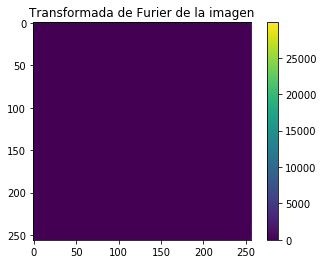

In [64]:
#Ploteo mapa de colores fft de la imagen
plt.figure()
plt.imshow(np.abs(img_fft))
plt.colorbar()
plt.title("Transformada de Furier de la imagen")
plt.savefig("DuarteJohn_FT2D.pdf",bbox_inches="tight")

/home/jadc/.local/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


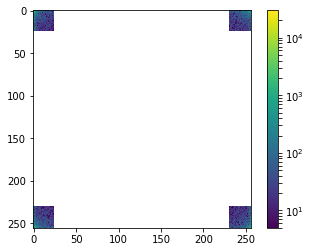

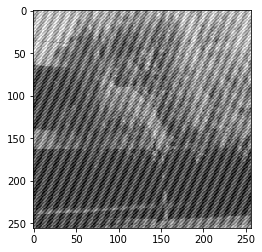

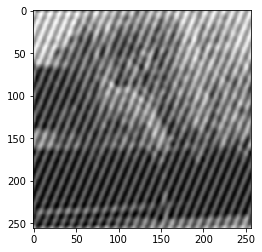

In [75]:
#Filtrado
#Fraccion de coeficientes a mantener
fraction = 0.
r,c = img_fft.shape
img_fft2 = img_fft.copy()
#Eliminado de estas fracciones de coeficientes
img_fft2[int(r*fraction):int(r*(1-fraction))] = 0
img_fft2[:, int(c*fraction):int(c*(1-fraction))] = 0

#Ploteo transformada de furier con filtro para ruido
plt.figure()
plt.imshow(np.abs(img_fft2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.savefig("DuarteJohn_FT2D_filtrada.pdf",bbox_inches="tight")

plt.figure()
plt.imshow(imagen, plt.cm.gray)

#Reconstruccion imagen filtro ruido y ploteo
img_nueva = fftpack.ifft2(img_fft2).real
plt.figure()
plt.imshow(img_nueva, plt.cm.gray)
plt.savefig("DuarteJohn_Imagen_filtrada.pdf",bbox_inches="tight")